In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import iBioGen

from collections import Counter
from itertools import combinations
from IPython.display import display

pd.set_option('display.max_columns', None)

Acari_fasta_file = "./CyprusMetabarcoding/Acari_237ASVs_sequences_44locations.fasta"
Acari_OTUs = "./CyprusMetabarcoding/Acari_237ASVs_table_44locations.txt"
Coleo_fasta_file = "./CyprusMetabarcoding/Coleoptera_353ASVs_sequences_44locations.fasta"
Coleo_OTUs = "./CyprusMetabarcoding/Coleoptera_353ASVs_table_44locations.txt"
Collem_fasta_file = "./CyprusMetabarcoding/Collembola_317ASVs_sequences_44locations.fasta"
Collem_OTUs = "./CyprusMetabarcoding/Collembola_317ASVs_table_44locations.txt"

## Load fasta data

In [2]:
def load_fasta(infile):
    dat = open(infile).readlines()
    names = dat[::2]
    seqs = dat[1::2]
    # Remove leading '>' and trailing size info and newlines
    names = [x[1:].split(";")[0].strip() for x in names]
    seqs = [x.strip() for x in seqs]
    return pd.Series({x:y for x, y in zip(names, seqs)})
ac_fasta = load_fasta(Acari_fasta_file)
cp_fasta = load_fasta(Coleo_fasta_file)
cb_fasta = load_fasta(Collem_fasta_file)
ac_fasta

ASVac100                 AATAAATAATATAAGATTTTGATTATTGCCACCATCCTTAACTTTA...
ASVac105                 GATAAATAATATAAGATTCTGACTTCTCCCTCCTTCTTTGACATTA...
ASVac1101                TATAAATAATATAAGTTTCTGGCTATTACCCCCTTCTTTATCCTTA...
ASVac113                 ATTAAATAATATAAGATTTTGACTATTAATCCCCTCATTATCTCTT...
ASVac1151                AATGAATAACATAAGTTTTTGACTCTTGCCGCCCTCTCTATCACTT...
                                               ...                        
Ac108ptp018Ac115Ac117    ATTAAACAACATAAGCTTTTGACTGATTCCCCCATCTCTCTCATTA...
Ac111ptp058              ATTGAACAATATAAGATTTTGATTCCTTCCACCATCATTACTATTG...
Ac120ptp067              AATAAATAACATGAGATTCTGATTACTCCCCCCATCTTTAACTTTA...
Ac123ptp069              AATAAATAATATAAGATTTTGGCTGCTTCCTCCTTCATTAGCTCTT...
Ac124ptp074              TTTAAATAATATAAGATTTTGACTTTTAATTCCTTCCATCTCTCTT...
Length: 237, dtype: object

In [3]:
def nucleotide_diversity(seqs, verbose=False):
    """
    Calculate nucleotide diversity from a list of sequences.
    `seqs` input should be a list of aligned sequences
    """
    pi = 0

    ## If no sequences or no variation
    if len(seqs) <= 1: return 0

    ## Transpose, so now we have a list of lists of all bases at each
    ## position.
    dat = np.transpose(np.array([list(x) for x in seqs]))

    ## for each position
    for d in dat:
        ## If the position is _not_ monomorphic
        if len(Counter(d)) > 1:
            if verbose: print(Counter(d))
            ## Enumerate the possible comparisons and for each
            ## comparison calculate the number of pairwise differences,
            ## summing over all sites in the sequence.
            base_count = Counter(d)
            ## ignore indels
            del base_count["-"]
            del base_count["N"]
            for c in combinations(base_count.values(), 2):
                #print(c)
                n = c[0] + c[1]
                n_comparisons = float(n) * (n - 1) / 2
                pi += float(c[0]) * (n-c[0]) / n_comparisons
    return pi/len(seqs[0])
# All samples from 1 OTU
nucleotide_diversity(ac_fasta[["ASVac105", "ASVac117", "ASVac119"]])

0.007974481658692184

## Load ASV tables

In [4]:
ac_df = pd.read_csv(Acari_OTUs,
           sep="\t", index_col=0)
cp_df = pd.read_csv(Coleo_OTUs,
           sep="\t", index_col=0)
cb_df = pd.read_csv(Collem_OTUs,
           sep="\t", index_col=0)
print(ac_df.shape, cp_df.shape, cb_df.shape)
# ac ASV Richness of the first few sites
print(ac_df.sum().head(10))
ac_df

(237, 44) (353, 44) (317, 44)
Cb01PSI     8
Cb02TRI    11
Cb03TRI    13
Cb04TRI    10
Cb05TRI    15
Cb06TRI    10
Cb07STR    16
Jn01CHI     8
Jn02CHI     5
Jn03CHI     6
dtype: int64


,Cb01PSI,Cb02TRI,Cb03TRI,Cb04TRI,Cb05TRI,Cb06TRI,Cb07STR,Jn01CHI,Jn02CHI,Jn03CHI,Jn04CHI,Jn05TRO,Jn06CHI,Jn07AMI,Jn08CHI,Pb01NWE,Pb02PSI,Pb03TRI,Pb04OIK,Pb05THE,Pb06SAI,Pb07LAG,Pb08MIT,Pb09KAP,Pb10LIT,Pn01PRO,Pn02CHI,Pn03CHI,Pn04CHI,Pn05CHI,Pn06CHI,Pn07TRO,Pn08AMI,Qa01NWE,Qa01TEST,Qa02PSI,Qa03TRI,Qa04STR,Qa05MIL,Qa06MAD,Qa07ALO,Qa08PAL,Qa09KIO,Qa10VAV
ASV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ASVac100,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
ASVac26118,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVac105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVac1101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
ASVac3222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ac090ptp072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ac104ptp062,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ac108ptp018Ac115Ac117,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
cb_df = pd.read_csv(Collem_OTUs,
           sep="\t", index_col=0)
print(cb_df.shape)
print(cb_df.sum().head(10))
cb_df

(317, 44)
Cb01PSI    15
Cb02TRI    25
Cb03TRI    24
Cb04TRI    23
Cb05TRI    24
Cb06TRI    19
Cb07STR    17
Jn01CHI    10
Jn02CHI     8
Jn03CHI     8
dtype: int64


,Cb01PSI,Cb02TRI,Cb03TRI,Cb04TRI,Cb05TRI,Cb06TRI,Cb07STR,Jn01CHI,Jn02CHI,Jn03CHI,Jn04CHI,Jn05TRO,Jn06CHI,Jn07AMI,Jn08CHI,Pb01NWE,Pb02PSI,Pb03TRI,Pb04OIK,Pb05THE,Pb06SAI,Pb07LAG,Pb08MIT,Pb09KAP,Pb10LIT,Pn01PRO,Pn02CHI,Pn03CHI,Pn04CHI,Pn05CHI,Pn06CHI,Pn07TRO,Pn08AMI,Qa01NWE,Qa01TEST,Qa02PSI,Qa03TRI,Qa04STR,Qa05MIL,Qa06MAD,Qa07ALO,Qa08PAL,Qa09KIO,Qa10VAV
ASV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ASVCb001ptp001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
ASVCb008ptp004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVcb1304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVcb1315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVcb1338,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASVcb811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVcb867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASVcb895,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dictionary mapping site codes to lists of sites

In [7]:
sites = ac_df.columns
site_codes = ["Cb", "Jn", "Pb", "Pn", "Qa"]
site_dict = {x:[y for y in sites if x in y] for x in site_codes}
print(site_dict)

{'Cb': ['Cb01PSI', 'Cb02TRI', 'Cb03TRI', 'Cb04TRI', 'Cb05TRI', 'Cb06TRI', 'Cb07STR'], 'Jn': ['Jn01CHI', 'Jn02CHI', 'Jn03CHI', 'Jn04CHI', 'Jn05TRO', 'Jn06CHI', 'Jn07AMI', 'Jn08CHI'], 'Pb': ['Pb01NWE', 'Pb02PSI', 'Pb03TRI', 'Pb04OIK', 'Pb05THE', 'Pb06SAI', 'Pb07LAG', 'Pb08MIT', 'Pb09KAP', 'Pb10LIT'], 'Pn': ['Pn01PRO', 'Pn02CHI', 'Pn03CHI', 'Pn04CHI', 'Pn05CHI', 'Pn06CHI', 'Pn07TRO', 'Pn08AMI'], 'Qa': ['Qa01NWE', 'Qa01TEST', 'Qa02PSI', 'Qa03TRI', 'Qa04STR', 'Qa05MIL', 'Qa06MAD', 'Qa07ALO', 'Qa08PAL', 'Qa09KIO', 'Qa10VAV']}


## Generate the vsearch cluster commands

In [6]:
cmd = ["vsearch",
           "-cluster_smallmem", "{fasta}",
           "-strand", "plus",
           "-id", "0.97",
           "-userout", "{taxa}.utmp",
           "-userfields", "query+target+id+gaps+qstrand+qcov",
           "-maxaccepts", "1",
           "-maxrejects", "0",
           "-notmatched", "{taxa}.htmp",
           "-fasta_width", "0",
           "-fulldp",
           "-usersort"]
fasta_files = {'acari':Acari_fasta_file,
          'coleo':Coleo_fasta_file,
          'collem':Collem_fasta_file}
for taxa, fasta in fasta_files.items():
    print(" ".join(cmd).format(fasta=fasta, taxa=taxa))

vsearch -cluster_smallmem ./CyprusMetabarcoding/Acari_237ASVs_sequences_44locations.fasta -strand plus -id 0.97 -userout acari.utmp -userfields query+target+id+gaps+qstrand+qcov -maxaccepts 1 -maxrejects 0 -notmatched acari.htmp -fasta_width 0 -fulldp -usersort
vsearch -cluster_smallmem ./CyprusMetabarcoding/Coleoptera_353ASVs_sequences_44locations.fasta -strand plus -id 0.97 -userout coleo.utmp -userfields query+target+id+gaps+qstrand+qcov -maxaccepts 1 -maxrejects 0 -notmatched coleo.htmp -fasta_width 0 -fulldp -usersort
vsearch -cluster_smallmem ./CyprusMetabarcoding/Collembola_317ASVs_sequences_44locations.fasta -strand plus -id 0.97 -userout collem.utmp -userfields query+target+id+gaps+qstrand+qcov -maxaccepts 1 -maxrejects 0 -notmatched collem.htmp -fasta_width 0 -fulldp -usersort


## Formulate OTU tables
Create two data structures:

    acari_OTUs - A dictionary mapping OTU IDs to a list of ASV names
    acari_samp2OTU - pd.Series mapping ASV names to OTU ID

In [13]:
acari_OTUs = {}
acari_samp2OTU = {}

# Get a list of all the ASV names
seeds = open("./CyprusMetabarcoding/acari.htmp").readlines()[::2]
# Split off the leading '>' and the trailing count info
seeds = [x[1:].split(";")[0].strip() for x in seeds]
print(len(seeds))
utmp_df = pd.read_csv("./CyprusMetabarcoding/acari.utmp", sep="\s+", header=None)
# Groupby the seed value (column 1)
for i,(k,v) in enumerate(utmp_df.groupby([1])):
    OTU_name = "Acari{}".format(i)
    ASVs = [k[0]] + v[0].tolist()
    acari_OTUs[OTU_name] = [x.split(";")[0] for x in ASVs]

    # The seed is first, remove it from seeds list
    seeds.remove(acari_OTUs[OTU_name][0])
    for a in ASVs:
        a = a.split(";")[0]
        acari_samp2OTU[a] = OTU_name
i += 1
# Add OTU singletons
for j, seed in zip(range(i, i+len(seeds)), seeds):
    OTU_name = "Acari{}".format(j)
    acari_OTUs[OTU_name] = [seed]
    acari_samp2OTU[seed] = OTU_name
acari_OTUs
acari_samp2OTU = pd.Series(acari_samp2OTU)
acari_samp2OTU

140


ASVac100                   Acari0
ASVac26118                 Acari0
ASVac105                   Acari1
ASVac117                   Acari1
ASVac119                   Acari1
                           ...   
Ac090ptp072              Acari135
Ac104ptp062              Acari136
Ac108ptp018Ac115Ac117    Acari137
Ac120ptp067              Acari138
Ac123ptp069              Acari139
Length: 237, dtype: object

## Make one giant OTU table for all groups

In [14]:
OTUs = {}
samp2OTU = {}

for tax in ["acari", "coleo", "collem"]:
    # Get a list of all the ASV names
    seeds = open(f"./CyprusMetabarcoding/{tax}.htmp").readlines()[::2]
    # Split off the leading '>' and the trailing count info
    seeds = [x[1:].split(";")[0].strip() for x in seeds]
    print(len(seeds))
    utmp_df = pd.read_csv(f"./CyprusMetabarcoding/{tax}.utmp", sep="\s+", header=None)
    # Groupby the seed value (column 1)
    for i,(k,v) in enumerate(utmp_df.groupby([1])):
        OTU_name = "{}{}".format(tax, i)
        ASVs = [k[0]] + v[0].tolist()
        OTUs[OTU_name] = [x.split(";")[0] for x in ASVs]

        # The seed is first, remove it from seeds list
        seeds.remove(OTUs[OTU_name][0])
        for a in ASVs:
            a = a.split(";")[0]
            samp2OTU[a] = OTU_name
    i += 1
    # Add OTU singletons
    for j, seed in zip(range(i, i+len(seeds)), seeds):
        OTU_name = "{}{}".format(tax, j)
        OTUs[OTU_name] = [seed]
        samp2OTU[seed] = OTU_name
samp2OTU = pd.Series(samp2OTU)
samp2OTU

140
154
93


ASVac100        acari0
ASVac26118      acari0
ASVac105        acari1
ASVac117        acari1
ASVac119        acari1
                ...   
ASVcb794      collem88
ASVcb811      collem89
ASVcb895      collem90
ASVcb939      collem91
ASVcb988      collem92
Length: 907, dtype: object

(array([362.,  16.,   2.,   2.,   2.,   1.,   1.,   1.]),
 array([ 1.   ,  5.125,  9.25 , 13.375, 17.5  , 21.625, 25.75 , 29.875,
        34.   ]),
 <BarContainer object of 8 artists>)

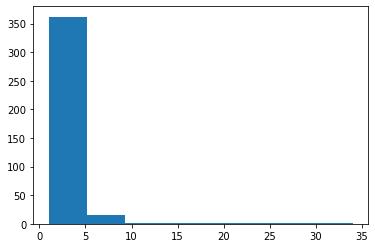

In [161]:
plt.hist([len(x) for x in OTUs.values()], bins=8)

## Fetch ASVs per site
Within a given site we need to know which ASVs belong to the same
OTU, so we can calculate pi per OTU within each site

Index(['ASVac105', 'ASVac117', 'ASVac119', 'ASVac231', 'ASVac175', 'ASVac218',
       'ASVac810', 'ASVac395'],
      dtype='object', name='ASV')


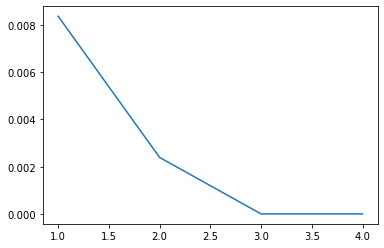

In [9]:
ASVs = ac_df[ac_df[sites[0]] > 0][sites[0]].index
print(ASVs)
site_ASV2OTU = {x:acari_samp2OTU[x] for x in ASVs}
site_OTUs = set(site_ASV2OTU.values())
pis = []
for o in site_OTUs:
    tmp_asvs = [x for x in ASVs if site_ASV2OTU[x] == o]
    pis.append(nucleotide_diversity(ac_fasta[tmp_asvs]))
plt.plot(range(1, len(pis)+1), sorted(pis, reverse=True))

## Get all ASVs per habitat type

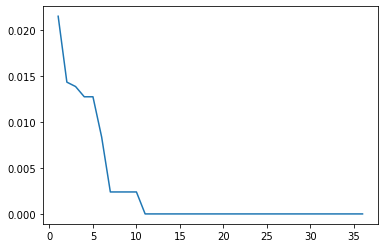

In [10]:
ASVs = ac_df[ac_df[site_dict["Cb"]].sum(axis=1) > 0].index
site_ASV2OTU = {x:acari_samp2OTU[x] for x in ASVs}
site_OTUs = set(site_ASV2OTU.values())
pis = []
for o in site_OTUs:
    tmp_asvs = [x for x in ASVs if site_ASV2OTU[x] == o]
    pis.append(nucleotide_diversity(ac_fasta[tmp_asvs]))
plt.plot(range(1, len(pis)+1), sorted(pis, reverse=True))

In [ ]:
def get_pis_site(sites, taxon=None):
    pis = []
    for tax, df, fasta in zip(["ac", "cp", "cb"],
                             [ac_df, cp_df, cb_df],
                             [ac_fasta, cp_fasta, cb_fasta]):
        # None indicates selecting all taxa
        if taxon == None or taxon == tax:
            ASVs = df[df[sites].sum(axis=1) > 0].index
            site_ASV2OTU = {x:samp2OTU[x] for x in ASVs}
            site_OTUs = set(site_ASV2OTU.values())

            for o in site_OTUs:
                tmp_asvs = [x for x in ASVs if site_ASV2OTU[x] == o]
                pis.append(nucleotide_diversity(fasta[tmp_asvs]))
    return pis
pis = get_pis_site(site_dict["Pb"])
plt.plot(range(1, len(pis)+1), sorted(pis, reverse=True))

/home/isaac/iBioGen/empirical_data


Pb 175
Qa 156
Cb 100
Pn 134


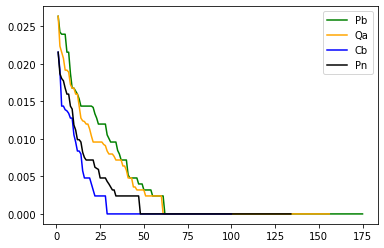

In [51]:
from scipy.stats import entropy

pb_pis = get_pis_site(site_dict["Pb"])
plt.plot(range(1, len(pb_pis)+1), sorted(pb_pis, reverse=True), label="Pb", color='green')
qa_pis = get_pis_site(site_dict["Qa"])
plt.plot(range(1, len(qa_pis)+1), sorted(qa_pis, reverse=True), label="Qa", color='orange')
cb_pis = get_pis_site(site_dict["Cb"])
plt.plot(range(1, len(cb_pis)+1), sorted(cb_pis, reverse=True), label="Cb", color='blue')
pn_pis = get_pis_site(site_dict["Pn"] + site_dict["Jn"])
plt.plot(range(1, len(pn_pis)+1), sorted(pn_pis, reverse=True), label="Pn", color='black')

for s, p in zip(["Pb", "Qa", "Cb", "Pn"],
                [pb_pis, qa_pis, cb_pis, pn_pis]):
    with open(f"./CyprusMetabarcoding/{s}_pis.txt", 'w') as outfile:
        outfile.write(",".join(map(str, p)))
    print(s, len(p))
plt.legend()

## Get pis per taxon per site

(array([1., 0., 1., 0., 2., 1., 2., 2., 0., 3.]),
 array([14. , 19.4, 24.8, 30.2, 35.6, 41. , 46.4, 51.8, 57.2, 62.6, 68. ]),
 <BarContainer object of 10 artists>)

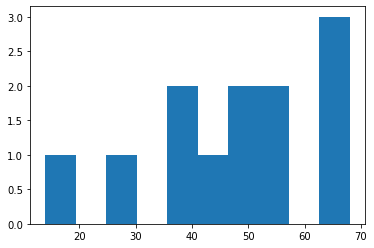

In [17]:
pis_per_site_by_taxon = {}
notus_per_site = []
for tax in ["ac", "cp", "cb"]:
    pis_per_site_by_taxon[tax] = {}
    for site in ["Pb", "Qa", "Cb", "Pn"]:
        if site == "Pn":
            # Lumping Pn and Jn
            pis_per_site_by_taxon[tax][site] =\
                    get_pis_site(site_dict["Pn"] + site_dict["Jn"],
                    taxon=tax)
        else:
            pis_per_site_by_taxon[tax][site] = get_pis_site(site_dict[site],
                                                           taxon=tax)
        notus_per_site.append(len(pis_per_site_by_taxon[tax][site]))
plt.hist(notus_per_site)

## Look at entropy values for observed data

Pb
[175.0, 49.84309707935977, 43.63958920704528, 39.89782427003464]
Qa
[155.99999999999997, 48.576700594078275, 41.83594311462686, 37.69666265829109]
Cb
[100.0, 22.445065589166013, 19.33247433176574, 17.54727953059973]
Pn
[134.0, 36.67418408783905, 30.502199318639438, 27.04117175892117]


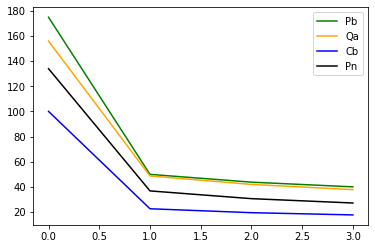

In [52]:
def hill_numbers(dat):
    hvals = []
    for i in range(4):
        hval = iBioGen.util._generalized_hill_number(abunds=dat,
                                                     order=i)
        if i == 1: hval = np.exp(entropy(dat))
        hvals.append(hval)
    return hvals

colors = {s:c for s,c in zip(["Pb", "Qa", "Cb", "Pn"],
                             ["green", "orange", "blue", "black"])}
for s, p in zip(["Pb", "Qa", "Cb", "Pn"],
                [pb_pis, qa_pis, cb_pis, pn_pis]):
    print(s)
    hvals = hill_numbers(p)
    with open(f"./CyprusMetabarcoding/{s}_hills.txt", 'w') as outfile:
        outfile.write(",".join(map(str, hvals)))
    print(hvals)
    plt.plot(range(4), hvals, label=s, color=colors[s])
_ = plt.legend()